In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
import os
os.chdir('/Users/mogarcia/Documents/Maestría_MCD/2do_semestre/Arquitectura_de_datos/bookish-journey-main/test')

In [65]:
base = pd.read_csv('ingredientes.csv')
print(base.shape)
base.head(10)

(425, 17)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15
0,11002,Long Island Tea,Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11000,Mojito,Light rum,Lime,Sugar,Mint,Soda water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11001,Old Fashioned,Bourbon,Angostura bitters,Sugar,Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11003,Negroni,Gin,Campari,Sweet Vermouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11004,Whiskey Sour,Blended whiskey,Lemon,Powdered sugar,Cherry,Lemon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11007,Margarita,Tequila,Triple sec,Lime juice,Salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11006,Daiquiri,Light rum,Lime,Powdered sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11005,Dry Martini,Gin,Dry Vermouth,Olive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11008,Manhattan,Sweet Vermouth,Bourbon,Angostura bitters,Ice,Maraschino cherry,Orange peel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11020,Algonquin,Blended whiskey,Dry Vermouth,Pineapple juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idDrink          425 non-null    int64  
 1   strDrink         425 non-null    object 
 2   strIngredient1   425 non-null    object 
 3   strIngredient2   425 non-null    object 
 4   strIngredient3   361 non-null    object 
 5   strIngredient4   230 non-null    object 
 6   strIngredient5   141 non-null    object 
 7   strIngredient6   62 non-null     object 
 8   strIngredient7   16 non-null     object 
 9   strIngredient8   4 non-null      object 
 10  strIngredient9   2 non-null      object 
 11  strIngredient10  1 non-null      object 
 12  strIngredient11  1 non-null      object 
 13  strIngredient12  0 non-null      float64
 14  strIngredient13  0 non-null      float64
 15  strIngredient14  0 non-null      float64
 16  strIngredient15  0 non-null      float64
dtypes: float64(4), i

In [67]:
base=base.drop(['strIngredient12','strIngredient13','strIngredient14','strIngredient15'],axis=1)

In [68]:
base=base.drop_duplicates()
print(base.shape)

(425, 13)


In [69]:
base0=base.copy()

In [70]:
base=base.replace(np.nan,"*")

In [71]:
base['ingredients']=base[['strIngredient1','strIngredient2','strIngredient3','strIngredient4','strIngredient5',
        'strIngredient6','strIngredient7','strIngredient8','strIngredient9','strIngredient10','strIngredient11']].agg(','.join, axis=1)
base.ingredients

0      Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,*,...
1       Light rum,Lime,Sugar,Mint,Soda water,*,*,*,*,*,*
2      Bourbon,Angostura bitters,Sugar,Water,*,*,*,*,...
3             Gin,Campari,Sweet Vermouth,*,*,*,*,*,*,*,*
4      Blended whiskey,Lemon,Powdered sugar,Cherry,Le...
                             ...                        
420             Vodka,Kahlua,Sugar syrup,*,*,*,*,*,*,*,*
421    Baileys irish cream,Kahlua,Sambuca,*,*,*,*,*,*...
422                         Vodka,Ouzo,*,*,*,*,*,*,*,*,*
423    Southern Comfort,Triple sec,Lime,Sour mix,*,*,...
424    Orange Bitters,Green Chartreuse,Gin,Sweet Verm...
Name: ingredients, Length: 425, dtype: object

In [72]:
#función para convertir el texto en minúsculas y sustituir espacios en blanco por underscore
def lower(text):
    text=text.lower().replace(" ","_")
    return text

In [73]:
ingredients_low=[]
for i in base.ingredients:
    il=lower(i)
    ingredients_low.append(il)

In [74]:
base['ingredients']=ingredients_low
base.ingredients

0      vodka,light_rum,gin,tequila,lemon,coca-cola,*,...
1       light_rum,lime,sugar,mint,soda_water,*,*,*,*,*,*
2      bourbon,angostura_bitters,sugar,water,*,*,*,*,...
3             gin,campari,sweet_vermouth,*,*,*,*,*,*,*,*
4      blended_whiskey,lemon,powdered_sugar,cherry,le...
                             ...                        
420             vodka,kahlua,sugar_syrup,*,*,*,*,*,*,*,*
421    baileys_irish_cream,kahlua,sambuca,*,*,*,*,*,*...
422                         vodka,ouzo,*,*,*,*,*,*,*,*,*
423    southern_comfort,triple_sec,lime,sour_mix,*,*,...
424    orange_bitters,green_chartreuse,gin,sweet_verm...
Name: ingredients, Length: 425, dtype: object

In [75]:
#función para tokenizar
def words(df):
    words=[]
    for i in range(425):
        p=base.ingredients[i].split(",")
        words=p+words
    return words

In [76]:
Ingredients=words(base)

In [77]:
ingredients_uniques=[]
for item in Ingredients:
    if item not in ingredients_uniques:
        ingredients_uniques.append(item)

print("The total number of ingredients: ", len(ingredients_uniques)-1)

The total number of ingredients:  294


In [78]:
#función para la frecuencia de los ingredientes
def frecuencia(lista):
    dic={}
    for palabra in lista:
        if palabra in dic.keys():
            dic[palabra]=dic[palabra]+1
        else:
            dic[palabra]=1
    return dic 

In [79]:
conteo=frecuencia(Ingredients)
conteo_dic=dict(sorted(conteo.items(),key=lambda item:item[1], reverse=True))
#conteo_dic

In [80]:
ingredients_df=pd.DataFrame.from_dict(conteo_dic,orient='index').rename(columns={0:'freq'})
ingredients_df


,freq
*,3007
gin,81
vodka,64
sugar,51
lemon_juice,50
...,...
pink_lemonade,1
cream_of_coconut,1
peach_brandy,1
mint_syrup,1


In [81]:
ingredients_df=ingredients_df[1:]

# Top 20 ingredients 

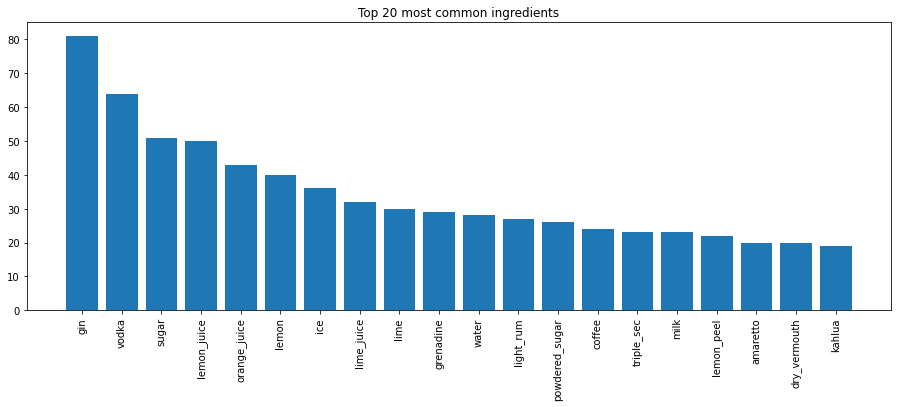

In [82]:
def plot_bar(ingredients_df, top=20):
    fig=plt.figure()
    ax=fig.add_axes([0,0,2,1])
    ax.bar(x=ingredients_df.iloc[:top,:].index, height=ingredients_df.iloc[:top,0].values)
    plt.xticks(rotation=90)
    plt.title("Top 20 most common ingredients")
    plt.show()

plot_bar(ingredients_df,20)

# Number of ingredients per cocktail

In [90]:
base0.shape
base0['num_ingredients']=11-base0.isnull().sum(axis=1)
base0.head(5)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,num_ingredients
0,11002,Long Island Tea,Vodka,Light rum,Gin,Tequila,Lemon,Coca-Cola,NaN,NaN,NaN,NaN,NaN,6
1,11000,Mojito,Light rum,Lime,Sugar,Mint,Soda water,NaN,NaN,NaN,NaN,NaN,NaN,5
2,11001,Old Fashioned,Bourbon,Angostura bitters,Sugar,Water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,11003,Negroni,Gin,Campari,Sweet Vermouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,11004,Whiskey Sour,Blended whiskey,Lemon,Powdered sugar,Cherry,Lemon,NaN,NaN,NaN,NaN,NaN,NaN,5


In [84]:
ing_per_cocktail=pd.DataFrame(base0['num_ingredients'].value_counts(),columns=['num_ingredients']).reset_index().sort_values(by=['num_ingredients'])
ing_per_cocktail['number_ingr']=['eleven','nine','eight','seven','six','two','five','four','three']
ing_per_cocktail

,index,num_ingredients,number_ingr
7,11,1,eleven
8,9,1,nine
6,8,2,eight
5,7,12,seven
4,6,46,six
3,2,64,two
2,5,79,five
1,4,89,four
0,3,131,three


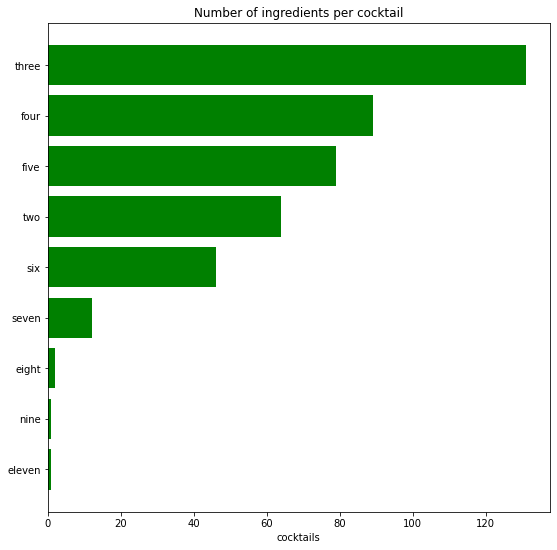

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(9,9)
ax.barh(y=ing_per_cocktail['number_ingr'], width=ing_per_cocktail['num_ingredients'],color='green');
ax.set_title("Number of ingredients per cocktail");
plt.xlabel('cocktails');